In [3]:
# STEP 1: Import Required Libraries
!pip install seaborn
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.3 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.7 MB 1.0 MB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.7 MB 1.4 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.7 MB 1.6 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.7 MB 2.0 MB/s eta 0:00:04
   -------------- ------------------------- 3.1/8.7 MB 2.1 MB/s eta 0:00:03
   ---------------- ----------------------- 3.7/8.7 MB 2.2 MB/s eta 0:00:03
   ------------------- -------------------- 4.2/8.7 MB 2.1 MB/s eta 0:00:03
   ------------------- -------------------- 4.2/8.7 MB 2.1 MB/s eta 0:00:03
   --------------------- ------------------ 4.7/8.7 MB 2.0 MB/s eta 0:00:02
   ---------------------- -------

In [6]:
# STEP 2: Load the Dataset
df = pd.read_csv('supply chain data.csv')
print("Initial Shape:", df.shape)
df.head()


Initial Shape: (100, 24)


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [7]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [8]:
# Load dataset
df = pd.read_csv("supply chain data.csv")

In [9]:
# Quick overview
print(df.head())
print(df.info())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [10]:
# Supply Chain Color Palette (green, blue, grey)
supply_chain_colors = ["#2E8B57", "#4682B4", "#708090", "#20B2AA", "#556B2F"]


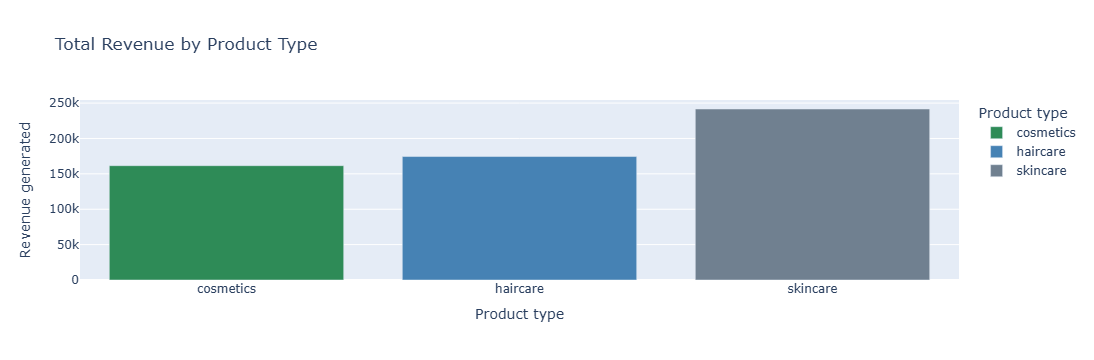

In [11]:
fig1 = px.bar(
    df.groupby("Product type")["Revenue generated"].sum().reset_index(),
    x="Product type",
    y="Revenue generated",
    color="Product type",
    color_discrete_sequence=supply_chain_colors,
    title="Total Revenue by Product Type",
    hover_data={"Revenue generated": ":,.2f"}
)
fig1.show()


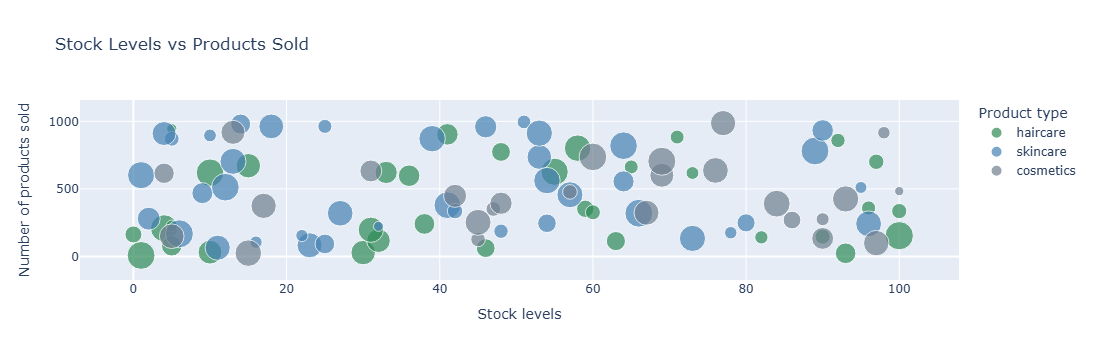

In [12]:
# Stock Levels vs Products Sold
fig2 = px.scatter(
    df,
    x="Stock levels",
    y="Number of products sold",
    color="Product type",
    size="Revenue generated",
    hover_name="Supplier name",
    color_discrete_sequence=supply_chain_colors,
    title="Stock Levels vs Products Sold"
)
fig2.show()

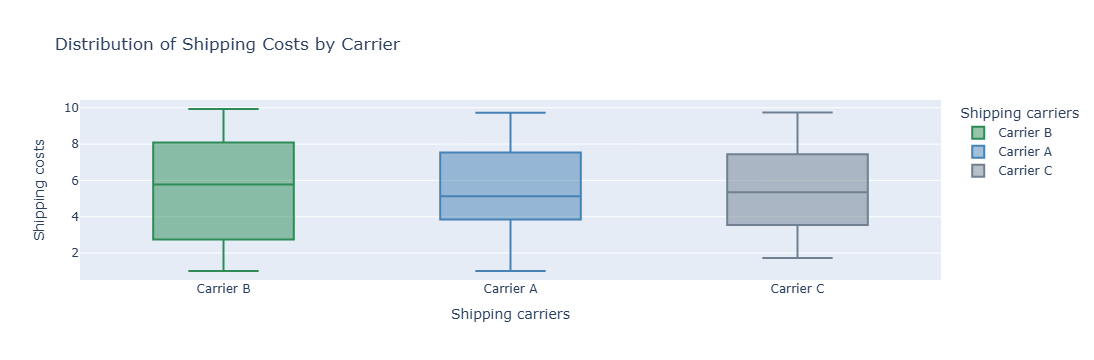

In [13]:
#  Shipping Cost by Carrier
fig3 = px.box(
    df,
    x="Shipping carriers",
    y="Shipping costs",
    color="Shipping carriers",
    color_discrete_sequence=supply_chain_colors,
    title="Distribution of Shipping Costs by Carrier"
)
fig3.show()

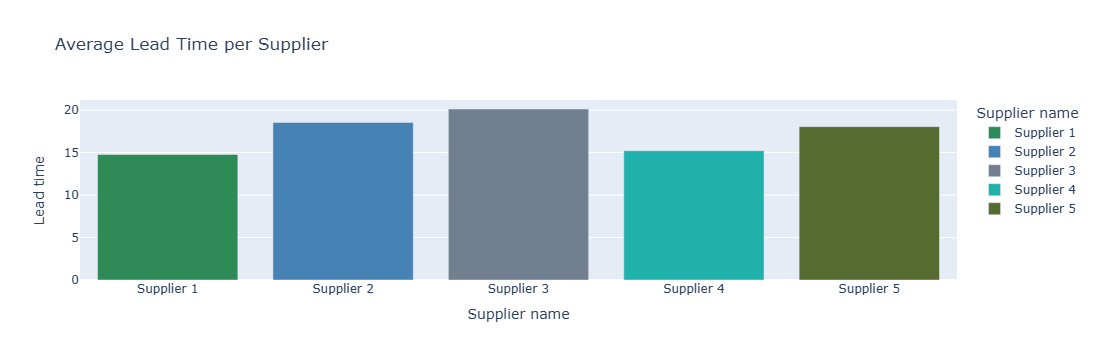

In [14]:
#  Lead Time by Supplier
fig4 = px.bar(
    df.groupby("Supplier name")["Lead time"].mean().reset_index(),
    x="Supplier name",
    y="Lead time",
    color="Supplier name",
    color_discrete_sequence=supply_chain_colors,
    title="Average Lead Time per Supplier",
    hover_data={"Lead time": ":.2f"}
)
fig4.show()

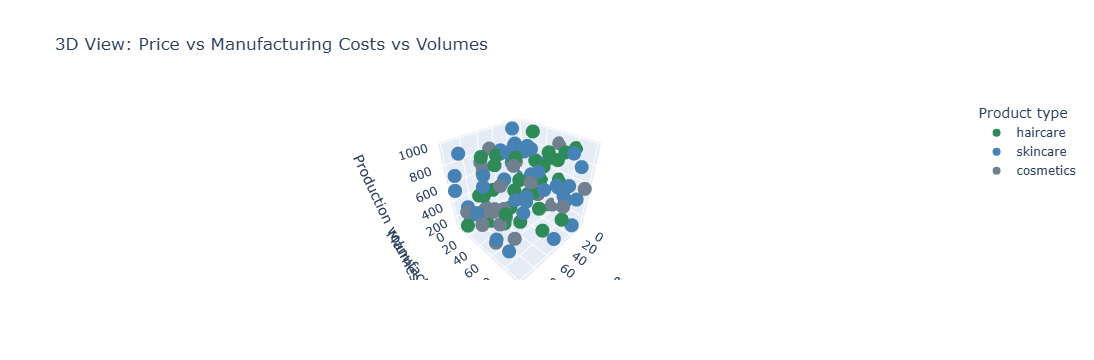

In [15]:
fig5 = px.scatter_3d(
    df,
    x="Price",
    y="Manufacturing costs",
    z="Production volumes",
    color="Product type",
    hover_name="SKU",
    color_discrete_sequence=supply_chain_colors,
    title="3D View: Price vs Manufacturing Costs vs Volumes"
)
fig5.show()

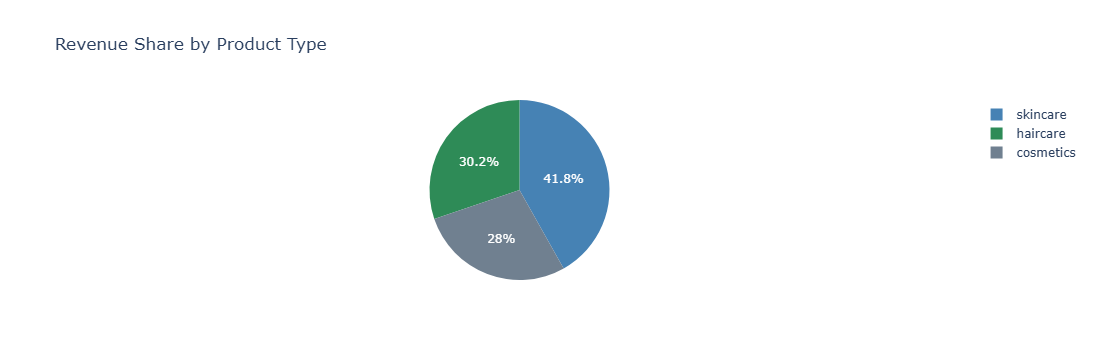

In [16]:
fig6 = px.pie(
    df,
    names="Product type",
    values="Revenue generated",
    color="Product type",
    color_discrete_sequence=supply_chain_colors,
    title="Revenue Share by Product Type",
    hole=0  # standard pie
)
fig6.show()

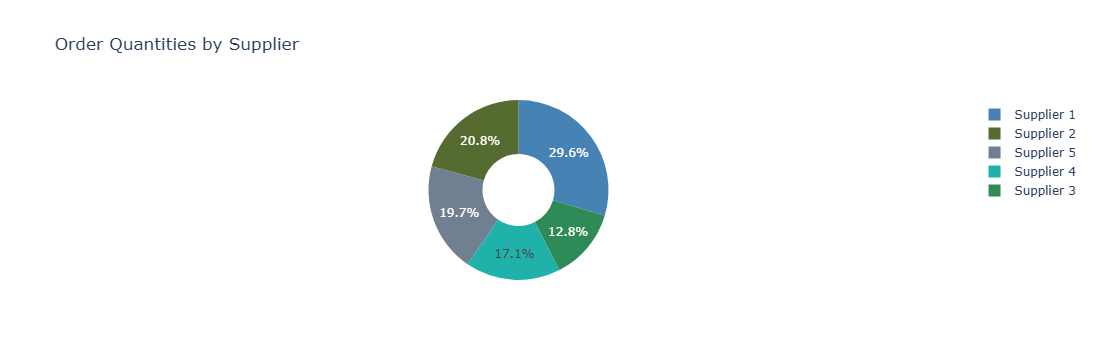

In [17]:
fig7 = px.pie(
    df,
    names="Supplier name",
    values="Order quantities",
    color="Supplier name",
    color_discrete_sequence=supply_chain_colors,
    title="Order Quantities by Supplier",
    hole=0.4  # donut style
)
fig7.show()

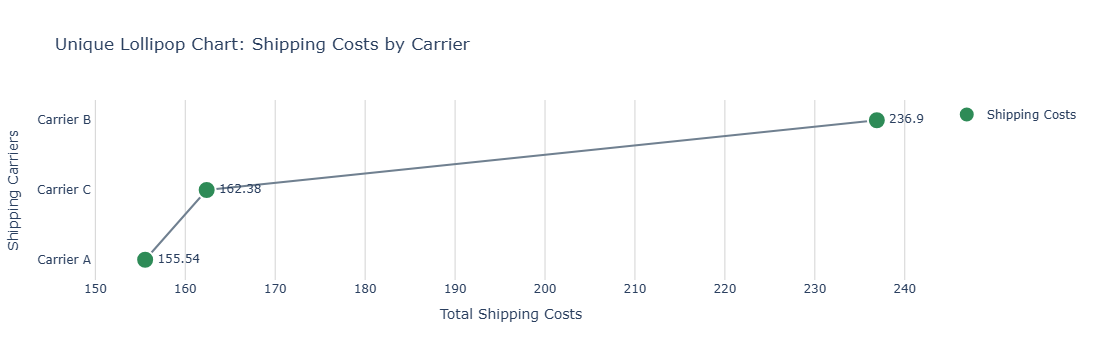

In [18]:
import plotly.graph_objects as go

# Aggregate shipping costs by carrier
shipping_costs = df.groupby("Shipping carriers")["Shipping costs"].sum().reset_index()

# Sort for better readability
shipping_costs = shipping_costs.sort_values("Shipping costs", ascending=True)

fig_unique = go.Figure()

# Add stems (lines)
fig_unique.add_trace(go.Scatter(
    x=shipping_costs["Shipping costs"],
    y=shipping_costs["Shipping carriers"],
    mode="lines",
    line=dict(color="#708090", width=2),
    showlegend=False
))

# Add  circles
fig_unique.add_trace(go.Scatter(
    x=shipping_costs["Shipping costs"],
    y=shipping_costs["Shipping carriers"],
    mode="markers+text",
    marker=dict(size=18, color="#2E8B57", line=dict(width=2, color="white")),
    text=shipping_costs["Shipping costs"].round(2),
    textposition="middle right",
    name="Shipping Costs"
))

fig_unique.update_layout(
    title="Unique Lollipop Chart: Shipping Costs by Carrier",
    xaxis_title="Total Shipping Costs",
    yaxis_title="Shipping Carriers",
    plot_bgcolor="white",
    xaxis=dict(showgrid=True, gridcolor="#D3D3D3"),
    yaxis=dict(showgrid=False)
)

fig_unique.show()